In [1]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
from scipy.signal import find_peaks, peak_prominences, peak_widths


In [2]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

Grounding Line plotting - Shelf Collapse Factor = 0 

In [3]:
gl_run_title_scf_0 = str("Grounding Line Evolution Over Time - SCF = 0")
scf_0 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_09__10_50_03.pkl.gz"
with gzip.open(scf_0, 'rb') as f:
    DATA_dict_scf_0 = pickle.load(f)

In [4]:
bed_dict = DATA_dict_scf_0['bed_dict']
base_dict = DATA_dict_scf_0['base_dict']
surf_dict= DATA_dict_scf_0 ['surf_dict']
sed_dict = DATA_dict_scf_0['sed_dict']
H_dict = DATA_dict_scf_0['H_dict']
us_dict = DATA_dict_scf_0['us_dict']
ub_dict = DATA_dict_scf_0['ub_dict']
Hs_dict = DATA_dict_scf_0['Hs_dict']
GL_dict = DATA_dict_scf_0['GL_dict']
Qs_dict = DATA_dict_scf_0['Qs_dict']

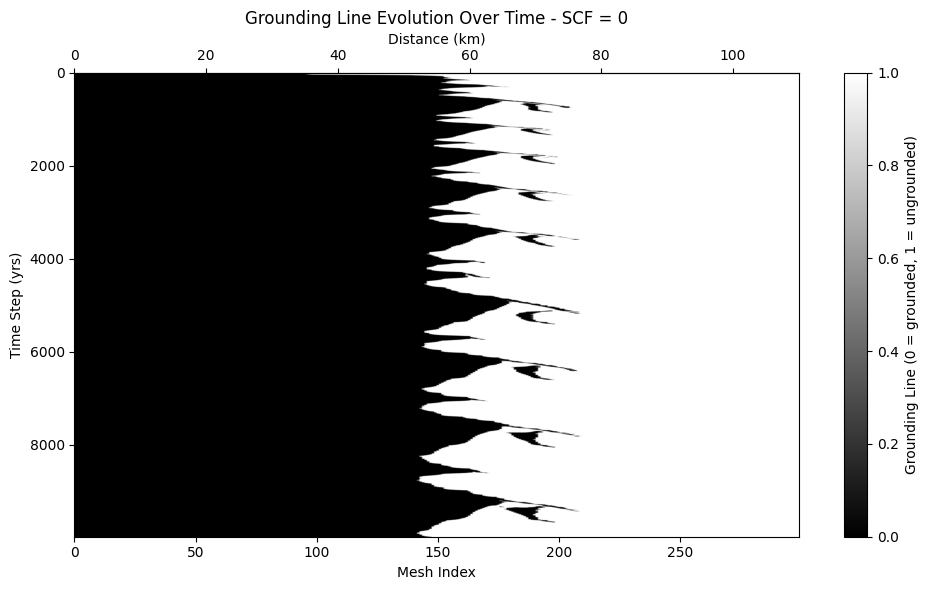

In [5]:
GL_dict = DATA_dict_scf_0['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_scf_0)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [6]:
gl_positions_scf_0 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_scf_0.append(idx)

gl_positions_scf_0 = np.array(gl_positions_scf_0)
GL_km_scf_0 = mesh_index_to_km(gl_positions_scf_0)



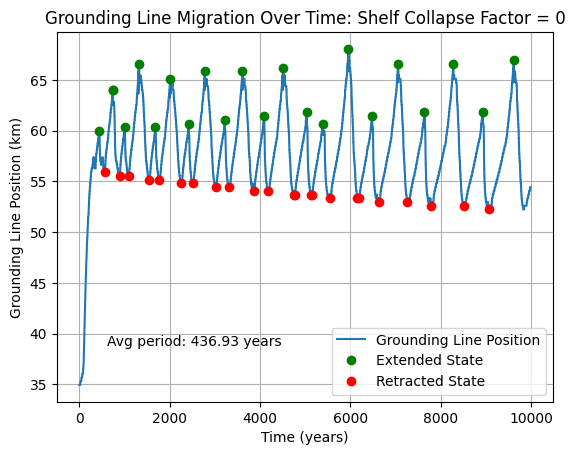

Mean cycle period: 436.93 years
[297.99631657   4.94834891 260.88103217 319.98958111 360.63310908
 326.97072458 412.02097165 359.36338552 436.56535957 393.26786555
 478.54703793 422.3806955  521.10088065 355.11566647 567.22336302
 524.53058615 576.556199   583.71615766 637.62913097 647.97756352
 688.07547297]
Mean advance amplitude: 63.51 km
[59.96655518 64.01337793 64.01337793 60.33444816 66.58862876 60.33444816
 65.11705686 60.70234114 65.85284281 61.07023411 65.85284281 61.43812709
 66.22073579 61.80602007 60.70234114 68.06020067 61.43812709 66.58862876
 61.80602007 66.58862876 61.80602007 66.95652174]
Mean retreat amplitude: 54.02 km
[55.91973244 55.55183946 55.55183946 55.18394649 55.18394649 54.81605351
 54.81605351 54.44816054 54.44816054 54.08026756 54.08026756 53.71237458
 53.71237458 53.71237458 53.71237458 53.34448161 53.34448161 53.34448161
 52.97658863 52.97658863 52.60869565 52.60869565 52.24080268]


In [7]:
peaks_scf0, _ = find_peaks(GL_km_scf_0, prominence=3) 
troughs_scf0, _ = find_peaks(-GL_km_scf_0, prominence=3)     
periods_scf0 = np.diff(np.array(time)[peaks_scf0])
adv_dists_scf0 = GL_km_scf_0[peaks_scf0]
ret_dists_scf0 = GL_km_scf_0[troughs_scf0]


plt.plot(time, GL_km_scf_0, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_scf0], GL_km_scf_0[peaks_scf0], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_scf0], GL_km_scf_0[troughs_scf0], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_scf0):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Shelf Collapse Factor = 0")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_scf0):.2f} years")
print(periods_scf0)

print(f"Mean advance amplitude: {np.mean(adv_dists_scf0):.2f} km")
print(adv_dists_scf0)

print(f"Mean retreat amplitude: {np.mean(ret_dists_scf0):.2f} km")
print(ret_dists_scf0)


Grounding Line plotting - Shelf Collapse Factor = 0.1 

In [8]:
gl_run_title_scf_01= str("Grounding Line Evolution Over Time - SCF = 0.1")
scf_01 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_09__16_50_07.pkl.gz"
with gzip.open(scf_01, 'rb') as f:
    DATA_dict_scf_01 = pickle.load(f)

In [9]:
bed_dict = DATA_dict_scf_01['bed_dict']
base_dict = DATA_dict_scf_01['base_dict']
surf_dict= DATA_dict_scf_01 ['surf_dict']
sed_dict = DATA_dict_scf_01['sed_dict']
H_dict = DATA_dict_scf_01['H_dict']
us_dict = DATA_dict_scf_01['us_dict']
ub_dict = DATA_dict_scf_01['ub_dict']
Hs_dict = DATA_dict_scf_01['Hs_dict']
GL_dict = DATA_dict_scf_01['GL_dict']
Qs_dict = DATA_dict_scf_01['Qs_dict']

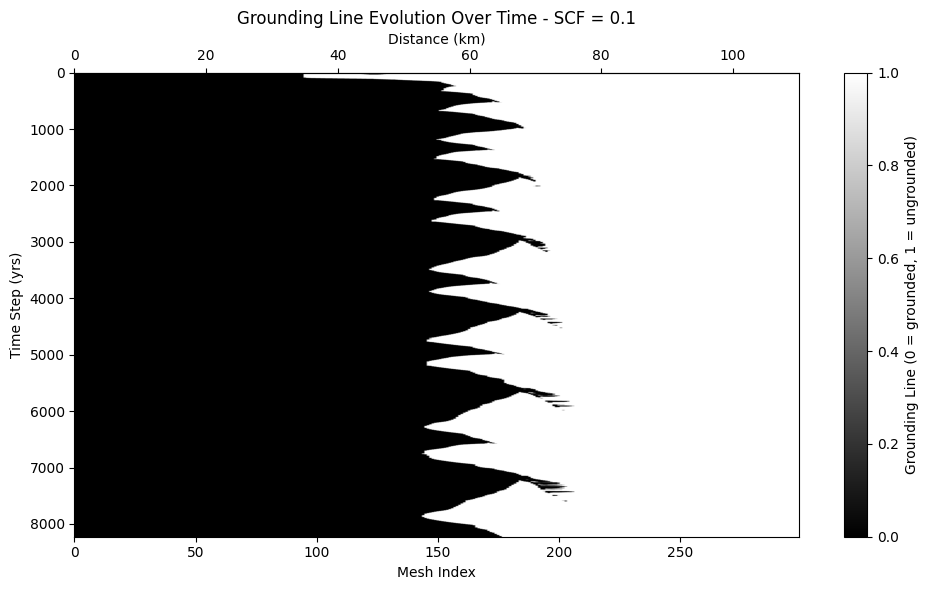

In [10]:
GL_dict = DATA_dict_scf_01['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_scf_01)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [11]:
gl_positions_scf_01 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_scf_01.append(idx)

gl_positions_scf_01 = np.array(gl_positions_scf_01)
GL_km_scf_01 = mesh_index_to_km(gl_positions_scf_01)



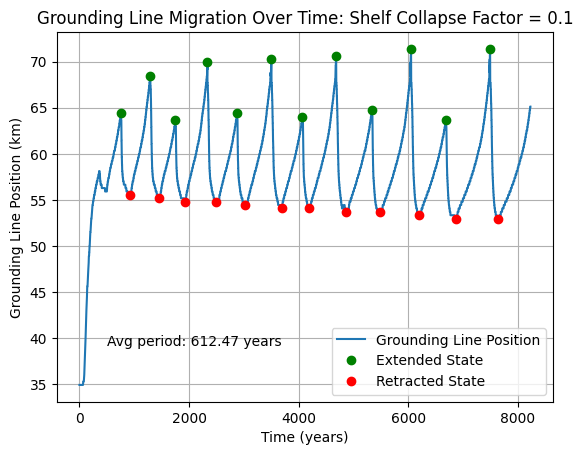

Mean cycle period: 612.47 years
[535.23374049 460.35478087 584.24708054 539.4645342  627.35473055
 566.55083515 615.57143691 652.52443804 714.46337068 633.82538417
 807.62195909]
Mean advance amplitude: 67.23 km
[64.3812709  68.42809365 63.64548495 69.89966555 64.3812709  70.26755853
 64.01337793 70.63545151 64.74916388 71.37123746 63.64548495 71.37123746]
Mean retreat amplitude: 54.14 km
[55.55183946 55.18394649 54.81605351 54.81605351 54.44816054 54.08026756
 54.08026756 53.71237458 53.71237458 53.34448161 52.97658863 52.97658863]


In [12]:
peaks_scf01, _ = find_peaks(GL_km_scf_01, prominence=3) 
troughs_scf01, _ = find_peaks(-GL_km_scf_01, prominence=3)     
periods_scf01 = np.diff(np.array(time)[peaks_scf01])
adv_dists_scf01 = GL_km_scf_01[peaks_scf01]
ret_dists_scf01 = GL_km_scf_01[troughs_scf01]


plt.plot(time, GL_km_scf_01, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_scf01], GL_km_scf_01[peaks_scf01], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_scf01], GL_km_scf_01[troughs_scf01], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_scf01):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Shelf Collapse Factor = 0.1")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_scf01):.2f} years")
print(periods_scf01)

print(f"Mean advance amplitude: {np.mean(adv_dists_scf01):.2f} km")
print(adv_dists_scf01)

print(f"Mean retreat amplitude: {np.mean(ret_dists_scf01):.2f} km")
print(ret_dists_scf01)


Grounding Line plotting - Shelf Collapse Factor = 0.2


In [13]:
gl_run_title_scf_02= str("Grounding Line Evolution Over Time - SCF = 0.2")
scf_02 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_10__10_07_41.pkl.gz"
with gzip.open(scf_02, 'rb') as f:
    DATA_dict_scf_02 = pickle.load(f)

In [14]:
bed_dict = DATA_dict_scf_02['bed_dict']
base_dict = DATA_dict_scf_02['base_dict']
surf_dict= DATA_dict_scf_02 ['surf_dict']
sed_dict = DATA_dict_scf_02['sed_dict']
H_dict = DATA_dict_scf_02['H_dict']
us_dict = DATA_dict_scf_02['us_dict']
ub_dict = DATA_dict_scf_02['ub_dict']
Hs_dict = DATA_dict_scf_02['Hs_dict']
GL_dict = DATA_dict_scf_02['GL_dict']
Qs_dict = DATA_dict_scf_02['Qs_dict']

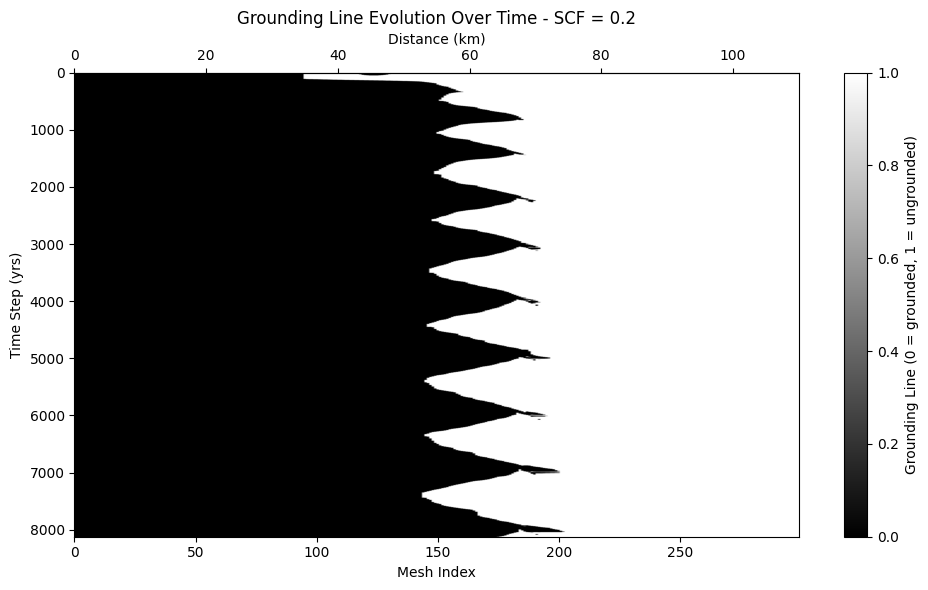

In [15]:
GL_dict = DATA_dict_scf_02['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_scf_02)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [16]:
gl_positions_scf_02 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_scf_02.append(idx)

gl_positions_scf_02 = np.array(gl_positions_scf_02)
GL_km_scf_02 = mesh_index_to_km(gl_positions_scf_02)



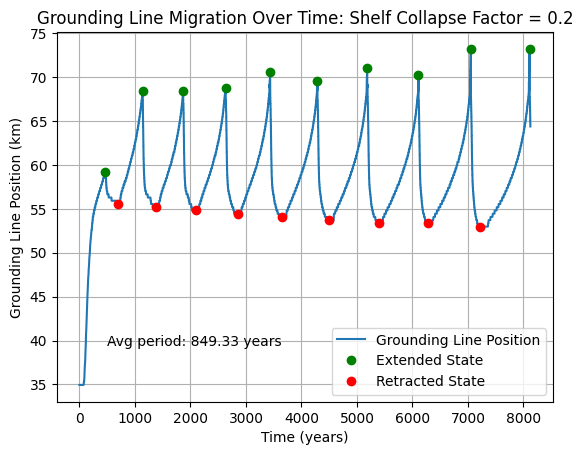

Mean cycle period: 849.33 years
[ 671.04104519  731.17664818  765.35723967  801.83053734  850.85569445
  897.86178343  923.5788195   943.37435896 1058.89407233]
Mean advance amplitude: 69.27 km
[59.23076923 68.42809365 68.42809365 68.79598662 70.63545151 69.53177258
 71.00334448 70.26755853 73.21070234 73.21070234]
Mean retreat amplitude: 54.16 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 53.34448161 52.97658863]


In [17]:
peaks_scf02, _ = find_peaks(GL_km_scf_02, prominence=3) 
troughs_scf02, _ = find_peaks(-GL_km_scf_02, prominence=3)     
periods_scf02 = np.diff(np.array(time)[peaks_scf02])
adv_dists_scf02 = GL_km_scf_02[peaks_scf02]
ret_dists_scf02 = GL_km_scf_02[troughs_scf02]


plt.plot(time, GL_km_scf_02, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_scf02], GL_km_scf_02[peaks_scf02], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_scf02], GL_km_scf_02[troughs_scf02], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_scf02):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Shelf Collapse Factor = 0.2")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_scf02):.2f} years")
print(periods_scf02)

print(f"Mean advance amplitude: {np.mean(adv_dists_scf02):.2f} km")
print(adv_dists_scf02)

print(f"Mean retreat amplitude: {np.mean(ret_dists_scf02):.2f} km")
print(ret_dists_scf02)


Grounding Line plotting - Shelf Collapse Factor = 0.3


In [18]:
gl_run_title_scf_03 = str("Grounding Line Evolution Over Time - SCF = 0.3")
scf_03 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_10__12_57_35.pkl.gz"
with gzip.open(scf_03, 'rb') as f:
    DATA_dict_scf_03 = pickle.load(f)

In [19]:
bed_dict = DATA_dict_scf_03['bed_dict']
base_dict = DATA_dict_scf_03['base_dict']
surf_dict= DATA_dict_scf_03 ['surf_dict']
sed_dict = DATA_dict_scf_03['sed_dict']
H_dict = DATA_dict_scf_03['H_dict']
us_dict = DATA_dict_scf_03['us_dict']
ub_dict = DATA_dict_scf_03['ub_dict']
Hs_dict = DATA_dict_scf_03['Hs_dict']
GL_dict = DATA_dict_scf_03['GL_dict']
Qs_dict = DATA_dict_scf_03['Qs_dict']

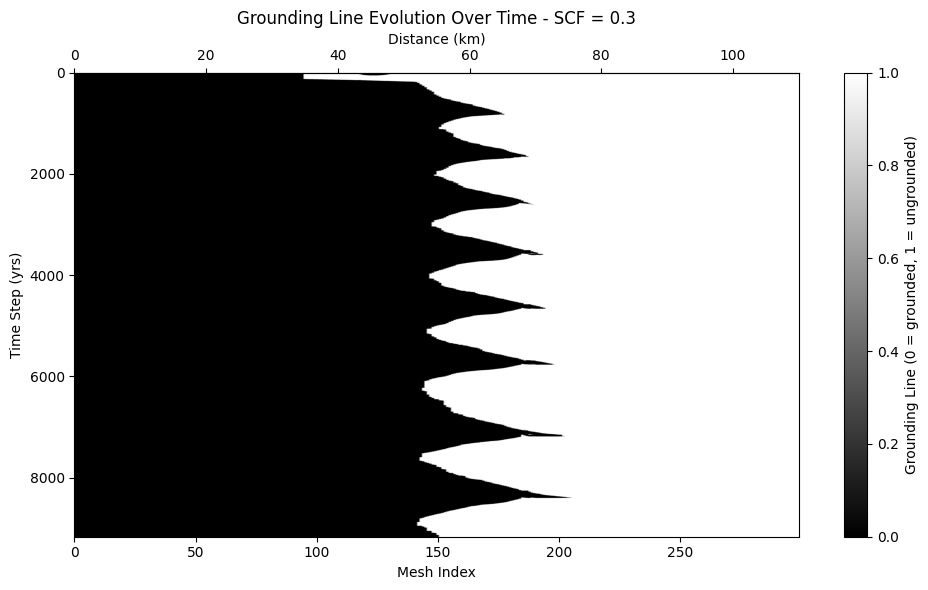

In [20]:
GL_dict = DATA_dict_scf_03['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_scf_03)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [21]:
gl_positions_scf_03 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_scf_03.append(idx)

gl_positions_scf_03 = np.array(gl_positions_scf_03)
GL_km_scf_03 = mesh_index_to_km(gl_positions_scf_03)



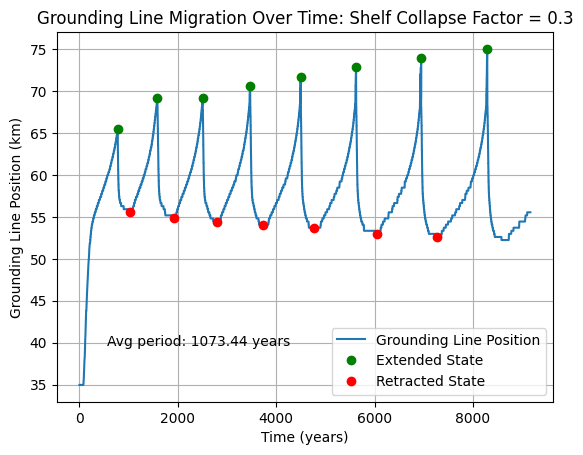

Mean cycle period: 1073.44 years
[ 808.50444029  919.0630519   965.34550393 1029.71260861 1124.82674693
 1323.31026878 1343.33250209]
Mean advance amplitude: 71.00 km
[65.48494983 69.1638796  69.1638796  70.63545151 71.73913043 72.84280936
 73.94648829 75.05016722]
Mean retreat amplitude: 54.03 km
[55.55183946 54.81605351 54.44816054 54.08026756 53.71237458 52.97658863
 52.60869565]


In [22]:
peaks_scf03, _ = find_peaks(GL_km_scf_03, prominence=4) 
troughs_scf03, _ = find_peaks(-GL_km_scf_03, prominence=4)     
periods_scf03 = np.diff(np.array(time)[peaks_scf03])
adv_dists_scf03 = GL_km_scf_03[peaks_scf03]
ret_dists_scf03 = GL_km_scf_03[troughs_scf03]


plt.plot(time, GL_km_scf_03, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_scf03], GL_km_scf_03[peaks_scf03], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_scf03], GL_km_scf_03[troughs_scf03], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_scf03):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Shelf Collapse Factor = 0.3")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_scf03):.2f} years")
print(periods_scf03)

print(f"Mean advance amplitude: {np.mean(adv_dists_scf03):.2f} km")
print(adv_dists_scf03)

print(f"Mean retreat amplitude: {np.mean(ret_dists_scf03):.2f} km")
print(ret_dists_scf03)


Grounding Line plotting - Shelf Collapse Factor = 0.4


In [23]:
gl_run_title_scf_04 = str("Grounding Line Evolution Over Time - SCF = 0.4")
scf_04 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_10__14_17_35.pkl.gz"
with gzip.open(scf_04, 'rb') as f:
    DATA_dict_scf_04 = pickle.load(f)

In [24]:
bed_dict = DATA_dict_scf_04['bed_dict']
base_dict = DATA_dict_scf_04['base_dict']
surf_dict= DATA_dict_scf_04 ['surf_dict']
sed_dict = DATA_dict_scf_04['sed_dict']
H_dict = DATA_dict_scf_04['H_dict']
us_dict = DATA_dict_scf_04['us_dict']
ub_dict = DATA_dict_scf_04['ub_dict']
Hs_dict = DATA_dict_scf_04['Hs_dict']
GL_dict = DATA_dict_scf_04['GL_dict']
Qs_dict = DATA_dict_scf_04['Qs_dict']

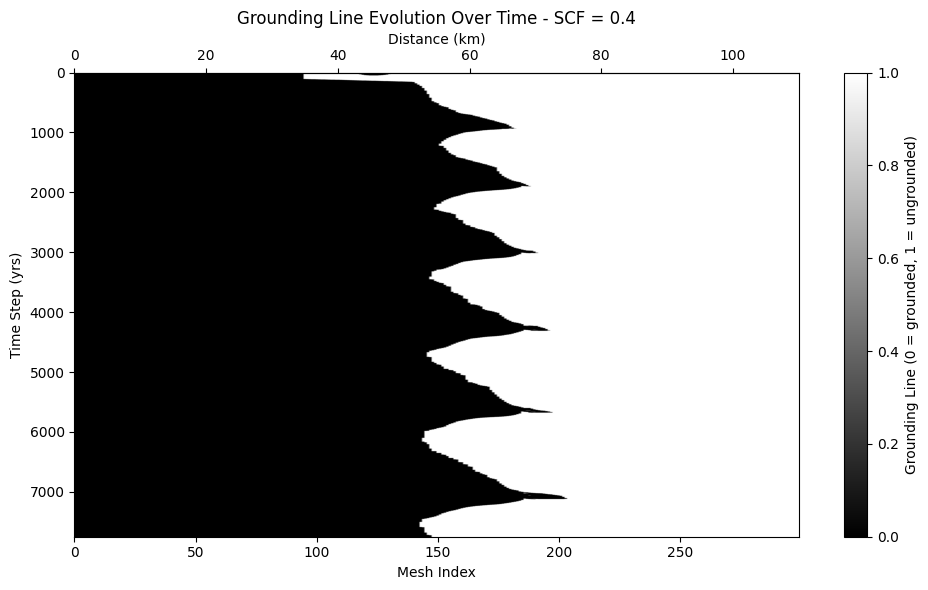

In [25]:
GL_dict = DATA_dict_scf_04['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_scf_04)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [26]:
gl_positions_scf_04 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_scf_04.append(idx)

gl_positions_scf_04 = np.array(gl_positions_scf_04)
GL_km_scf_04 = mesh_index_to_km(gl_positions_scf_04)



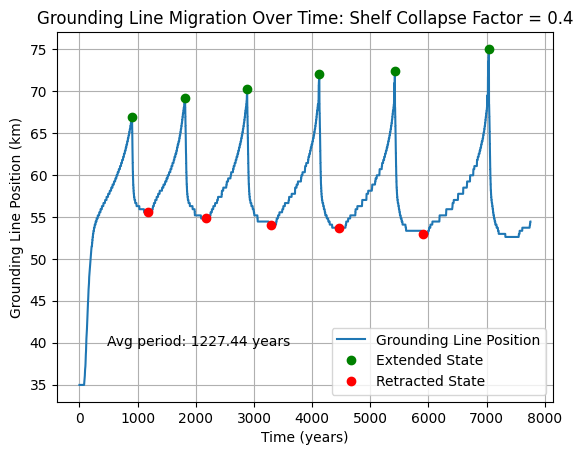

Mean cycle period: 1227.44 years
[ 911.85123738 1068.28867923 1241.29587554 1300.29042612 1615.49787653]
Mean advance amplitude: 71.00 km
[66.95652174 69.1638796  70.26755853 72.10702341 72.47491639 75.05016722]
Mean retreat amplitude: 54.23 km
[55.55183946 54.81605351 54.08026756 53.71237458 52.97658863]


In [27]:
peaks_scf04, _ = find_peaks(GL_km_scf_04, prominence=5) 
troughs_scf04, _ = find_peaks(-GL_km_scf_04, prominence=5)     
periods_scf04 = np.diff(np.array(time)[peaks_scf04])
adv_dists_scf04 = GL_km_scf_04[peaks_scf04]
ret_dists_scf04 = GL_km_scf_04[troughs_scf04]


plt.plot(time, GL_km_scf_04, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_scf04], GL_km_scf_04[peaks_scf04], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_scf04], GL_km_scf_04[troughs_scf04], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_scf04):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Shelf Collapse Factor = 0.4")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_scf04):.2f} years")
print(periods_scf04)

print(f"Mean advance amplitude: {np.mean(adv_dists_scf04):.2f} km")
print(adv_dists_scf04)

print(f"Mean retreat amplitude: {np.mean(ret_dists_scf04):.2f} km")
print(ret_dists_scf04)


Grounding Line plotting - Shelf Collapse Factor = 0.5


In [28]:
gl_run_title_scf_05 = str("Grounding Line Evolution Over Time - SCF = 0.5")
scf_05 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_10__15_44_41.pkl.gz"
with gzip.open(scf_05, 'rb') as f:
    DATA_dict_scf_05 = pickle.load(f)

In [29]:
bed_dict = DATA_dict_scf_05['bed_dict']
base_dict = DATA_dict_scf_05['base_dict']
surf_dict= DATA_dict_scf_05 ['surf_dict']
sed_dict = DATA_dict_scf_05['sed_dict']
H_dict = DATA_dict_scf_05['H_dict']
us_dict = DATA_dict_scf_05['us_dict']
ub_dict = DATA_dict_scf_05['ub_dict']
Hs_dict = DATA_dict_scf_05['Hs_dict']
GL_dict = DATA_dict_scf_05['GL_dict']
Qs_dict = DATA_dict_scf_05['Qs_dict']

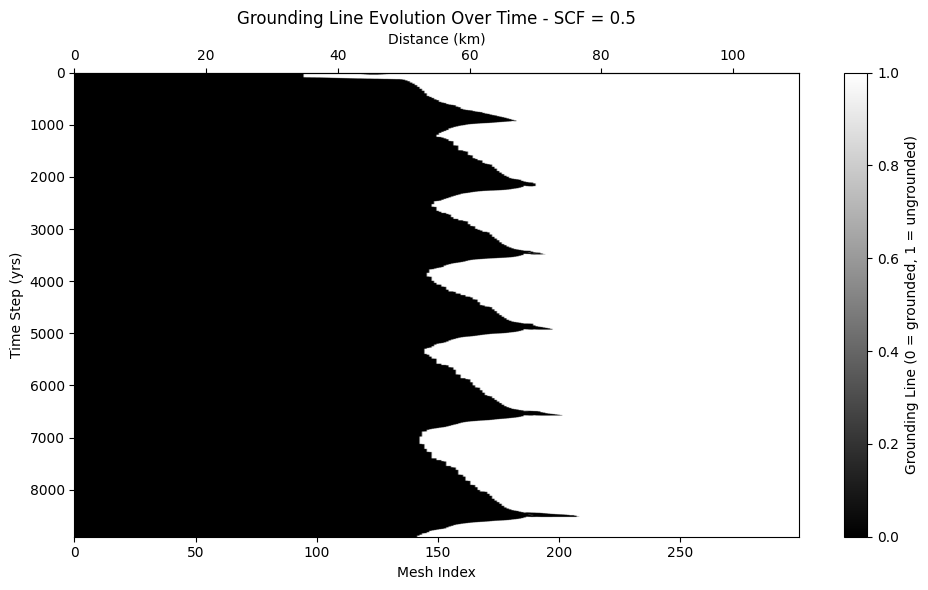

In [30]:
GL_dict = DATA_dict_scf_05['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_scf_05)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [31]:
gl_positions_scf_05 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_scf_05.append(idx)

gl_positions_scf_05 = np.array(gl_positions_scf_05)
GL_km_scf_05 = mesh_index_to_km(gl_positions_scf_05)



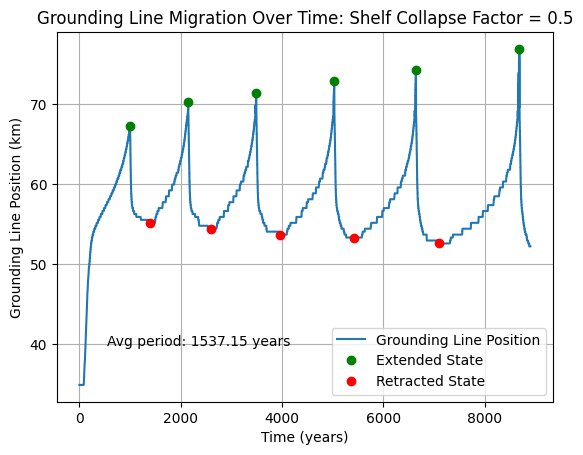

Mean cycle period: 1537.15 years
[1148.4338117  1342.54973535 1540.74694283 1612.00279791 2041.99891655]
Mean advance amplitude: 72.17 km
[67.32441472 70.26755853 71.37123746 72.84280936 74.31438127 76.88963211]
Mean retreat amplitude: 53.86 km
[55.18394649 54.44816054 53.71237458 53.34448161 52.60869565]


In [32]:
peaks_scf05, _ = find_peaks(GL_km_scf_05, prominence=6) 
troughs_scf05, _ = find_peaks(-GL_km_scf_05, prominence=6)     
periods_scf05 = np.diff(np.array(time)[peaks_scf05])
adv_dists_scf05 = GL_km_scf_05[peaks_scf05]
ret_dists_scf05 = GL_km_scf_05[troughs_scf05]


plt.plot(time, GL_km_scf_05, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_scf05], GL_km_scf_05[peaks_scf05], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_scf05], GL_km_scf_05[troughs_scf05], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_scf05):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Shelf Collapse Factor = 0.5")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_scf05):.2f} years")
print(periods_scf05)

print(f"Mean advance amplitude: {np.mean(adv_dists_scf05):.2f} km")
print(adv_dists_scf05)

print(f"Mean retreat amplitude: {np.mean(ret_dists_scf05):.2f} km")
print(ret_dists_scf05)


Grounding Line plotting - Shelf Collapse Factor = 0.6


In [33]:
gl_run_title_scf_06 = str("Grounding Line Evolution Over Time - SCF = 0.6")
scf_06 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_11__12_41_43.pkl.gz"
with gzip.open(scf_06, 'rb') as f:
    DATA_dict_scf_06 = pickle.load(f)

In [34]:
bed_dict = DATA_dict_scf_06['bed_dict']
base_dict = DATA_dict_scf_06['base_dict']
surf_dict= DATA_dict_scf_06 ['surf_dict']
sed_dict = DATA_dict_scf_06['sed_dict']
H_dict = DATA_dict_scf_06['H_dict']
us_dict = DATA_dict_scf_06['us_dict']
ub_dict = DATA_dict_scf_06['ub_dict']
Hs_dict = DATA_dict_scf_06['Hs_dict']
GL_dict = DATA_dict_scf_06['GL_dict']
Qs_dict = DATA_dict_scf_06['Qs_dict']

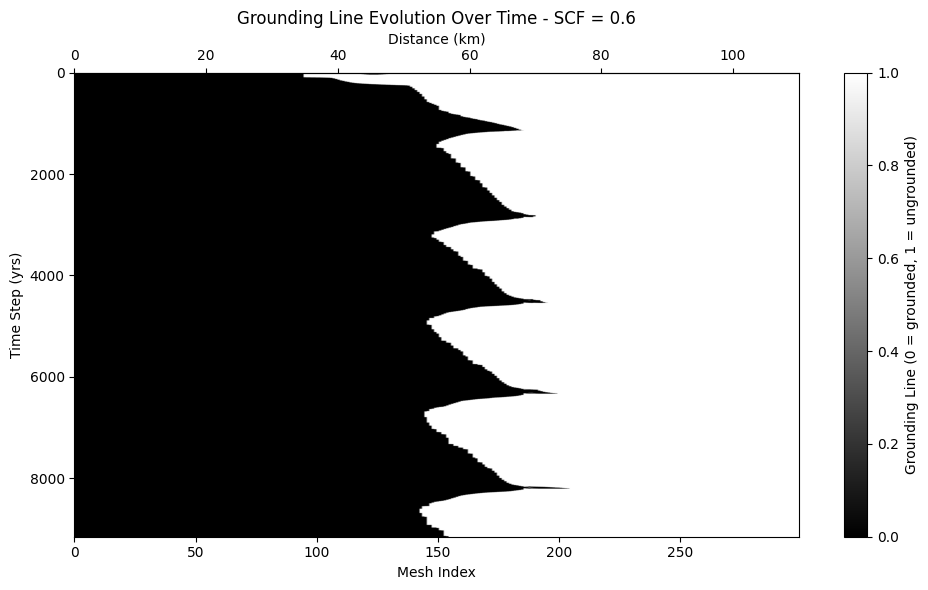

In [35]:
GL_dict = DATA_dict_scf_06['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_scf_06)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [36]:
gl_positions_scf_06 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_scf_06.append(idx)

gl_positions_scf_06 = np.array(gl_positions_scf_06)
GL_km_scf_06 = mesh_index_to_km(gl_positions_scf_06)



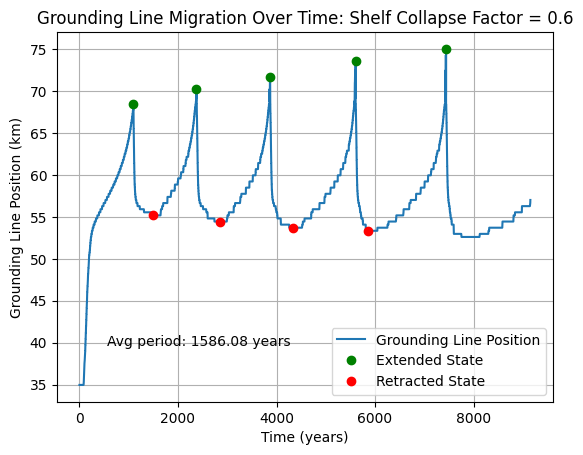

Mean cycle period: 1586.08 years
[1276.70885089 1496.40671742 1735.43037587 1835.77493742]
Mean advance amplitude: 71.81 km
[68.42809365 70.26755853 71.73913043 73.57859532 75.05016722]
Mean retreat amplitude: 54.17 km
[55.18394649 54.44816054 53.71237458 53.34448161]


In [37]:
peaks_scf06, _ = find_peaks(GL_km_scf_06, prominence=6) 
troughs_scf06, _ = find_peaks(-GL_km_scf_06, prominence=5)     
periods_scf06 = np.diff(np.array(time)[peaks_scf06])
adv_dists_scf06 = GL_km_scf_06[peaks_scf06]
ret_dists_scf06 = GL_km_scf_06[troughs_scf06]


plt.plot(time, GL_km_scf_06, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_scf06], GL_km_scf_06[peaks_scf06], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_scf06], GL_km_scf_06[troughs_scf06], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_scf06):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Shelf Collapse Factor = 0.6")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_scf06):.2f} years")
print(periods_scf06)

print(f"Mean advance amplitude: {np.mean(adv_dists_scf06):.2f} km")
print(adv_dists_scf06)

print(f"Mean retreat amplitude: {np.mean(ret_dists_scf06):.2f} km")
print(ret_dists_scf06)


Grounding Line plotting - Shelf Collapse Factor = 0.7


In [38]:
gl_run_title_scf_07 = str("Grounding Line Evolution Over Time - SCF = 0.7")
scf_07 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_11__14_57_37.pkl.gz"
with gzip.open(scf_07, 'rb') as f:
    DATA_dict_scf_07 = pickle.load(f)

In [39]:
bed_dict = DATA_dict_scf_07['bed_dict']
base_dict = DATA_dict_scf_07['base_dict']
surf_dict= DATA_dict_scf_07 ['surf_dict']
sed_dict = DATA_dict_scf_07['sed_dict']
H_dict = DATA_dict_scf_07['H_dict']
us_dict = DATA_dict_scf_07['us_dict']
ub_dict = DATA_dict_scf_07['ub_dict']
Hs_dict = DATA_dict_scf_07['Hs_dict']
GL_dict = DATA_dict_scf_07['GL_dict']
Qs_dict = DATA_dict_scf_07['Qs_dict']

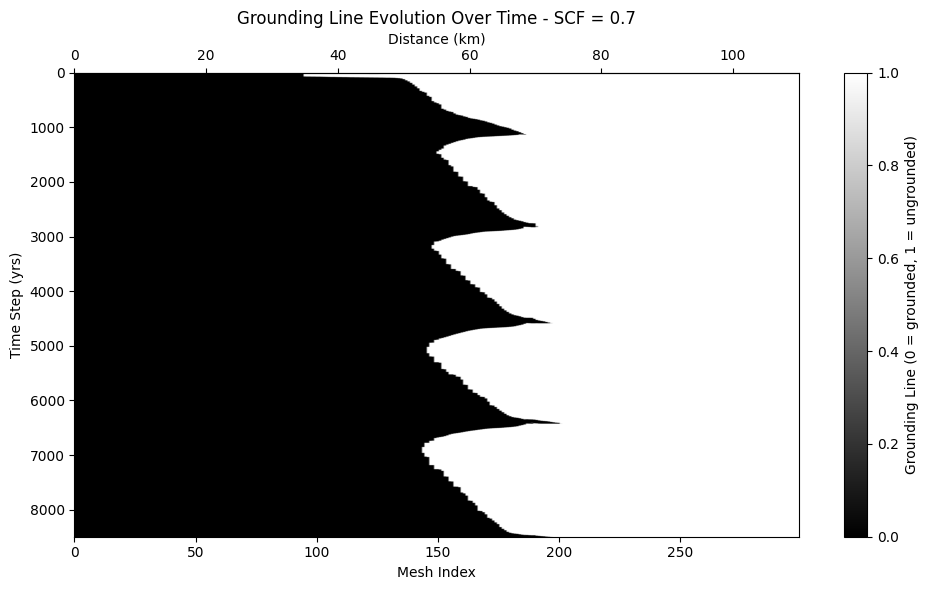

In [40]:
GL_dict = DATA_dict_scf_07['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_scf_07)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [41]:
gl_positions_scf_07 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_scf_07.append(idx)

gl_positions_scf_07 = np.array(gl_positions_scf_07)
GL_km_scf_07 = mesh_index_to_km(gl_positions_scf_07)



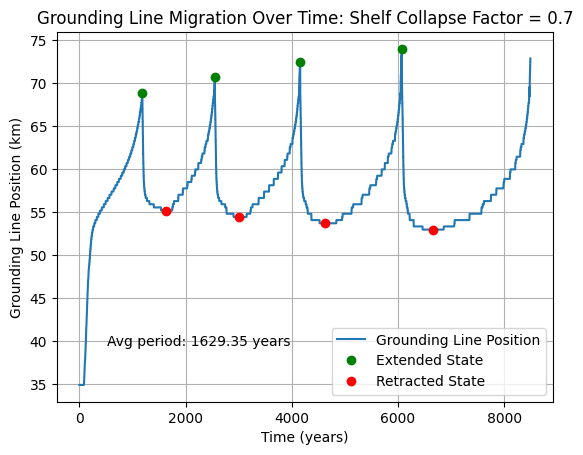

Mean cycle period: 1629.35 years
[1362.68166071 1609.6283946  1915.73525534]
Mean advance amplitude: 71.46 km
[68.79598662 70.63545151 72.47491639 73.94648829]
Mean retreat amplitude: 54.08 km
[55.18394649 54.44816054 53.71237458 52.97658863]


In [42]:
peaks_scf07, _ = find_peaks(GL_km_scf_07, prominence=5) 
troughs_scf07, _ = find_peaks(-GL_km_scf_07, prominence=5)     
periods_scf07 = np.diff(np.array(time)[peaks_scf07])
adv_dists_scf07 = GL_km_scf_07[peaks_scf07]
ret_dists_scf07 = GL_km_scf_07[troughs_scf07]


plt.plot(time, GL_km_scf_07, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_scf07], GL_km_scf_07[peaks_scf07], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_scf07], GL_km_scf_07[troughs_scf07], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_scf07):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Shelf Collapse Factor = 0.7")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_scf07):.2f} years")
print(periods_scf07)

print(f"Mean advance amplitude: {np.mean(adv_dists_scf07):.2f} km")
print(adv_dists_scf07)

print(f"Mean retreat amplitude: {np.mean(ret_dists_scf07):.2f} km")
print(ret_dists_scf07)


Grounding Line plotting - Shelf Collapse Factor = 0.8


In [43]:
gl_run_title_scf_08 = str("Grounding Line Evolution Over Time - SCF = 0.8")
scf_08 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_11__17_36_52.pkl.gz"
with gzip.open(scf_08, 'rb') as f:
    DATA_dict_scf_08 = pickle.load(f)

In [44]:
bed_dict = DATA_dict_scf_08['bed_dict']
base_dict = DATA_dict_scf_08['base_dict']
surf_dict= DATA_dict_scf_08 ['surf_dict']
sed_dict = DATA_dict_scf_08['sed_dict']
H_dict = DATA_dict_scf_08['H_dict']
us_dict = DATA_dict_scf_08['us_dict']
ub_dict = DATA_dict_scf_08['ub_dict']
Hs_dict = DATA_dict_scf_08['Hs_dict']
GL_dict = DATA_dict_scf_08['GL_dict']
Qs_dict = DATA_dict_scf_08['Qs_dict']

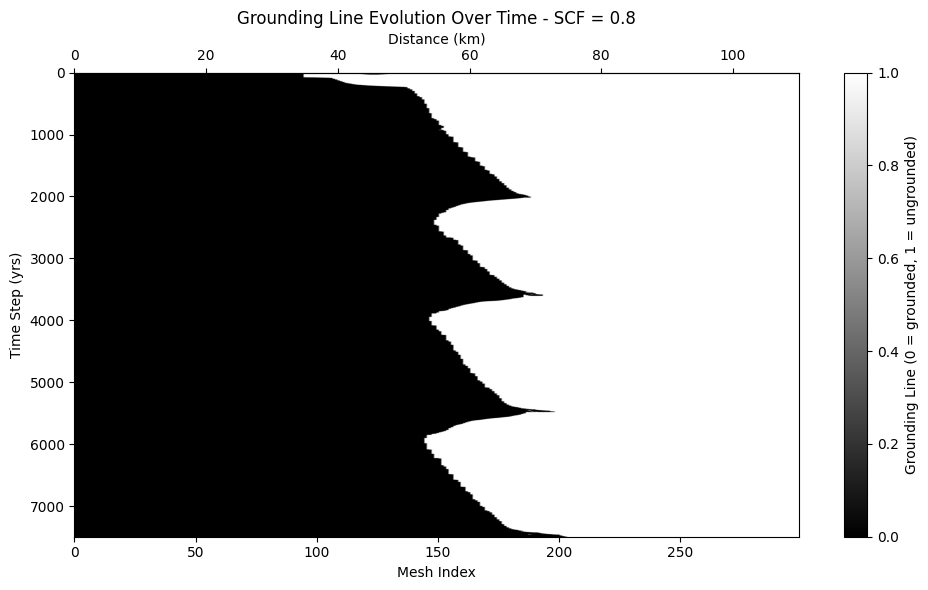

In [45]:
GL_dict = DATA_dict_scf_08['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_scf_08)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [46]:
gl_positions_scf_08 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_scf_08.append(idx)

gl_positions_scf_08 = np.array(gl_positions_scf_08)
GL_km_scf_08 = mesh_index_to_km(gl_positions_scf_08)



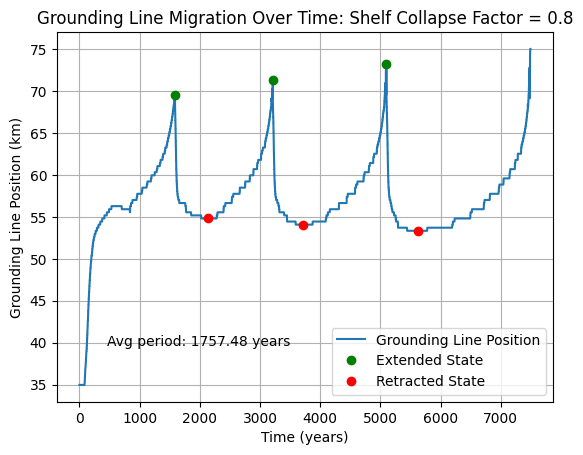

Mean cycle period: 1757.48 years
[1628.53973755 1886.42289776]
Mean advance amplitude: 71.37 km
[69.53177258 71.37123746 73.21070234]
Mean retreat amplitude: 54.08 km
[54.81605351 54.08026756 53.34448161]


In [47]:
peaks_scf08, _ = find_peaks(GL_km_scf_08, prominence=5) 
troughs_scf08, _ = find_peaks(-GL_km_scf_08, prominence=5)     
periods_scf08 = np.diff(np.array(time)[peaks_scf08])
adv_dists_scf08 = GL_km_scf_08[peaks_scf08]
ret_dists_scf08 = GL_km_scf_08[troughs_scf08]


plt.plot(time, GL_km_scf_08, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_scf08], GL_km_scf_08[peaks_scf08], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_scf08], GL_km_scf_08[troughs_scf08], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_scf08):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Shelf Collapse Factor = 0.8")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_scf08):.2f} years")
print(periods_scf08)

print(f"Mean advance amplitude: {np.mean(adv_dists_scf08):.2f} km")
print(adv_dists_scf08)

print(f"Mean retreat amplitude: {np.mean(ret_dists_scf08):.2f} km")
print(ret_dists_scf08)


Grounding Line plotting - Shelf Collapse Factor = 0.9


In [48]:
gl_run_title_scf_09 = str("Grounding Line Evolution Over Time - SCF = 0.9")
scf_09 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_11__21_54_10.pkl.gz"
with gzip.open(scf_09, 'rb') as f:
    DATA_dict_scf_09 = pickle.load(f)

In [49]:
bed_dict = DATA_dict_scf_09['bed_dict']
base_dict = DATA_dict_scf_09['base_dict']
surf_dict= DATA_dict_scf_09 ['surf_dict']
sed_dict = DATA_dict_scf_09['sed_dict']
H_dict = DATA_dict_scf_09['H_dict']
us_dict = DATA_dict_scf_09['us_dict']
ub_dict = DATA_dict_scf_09['ub_dict']
Hs_dict = DATA_dict_scf_09['Hs_dict']
GL_dict = DATA_dict_scf_09['GL_dict']
Qs_dict = DATA_dict_scf_09['Qs_dict']

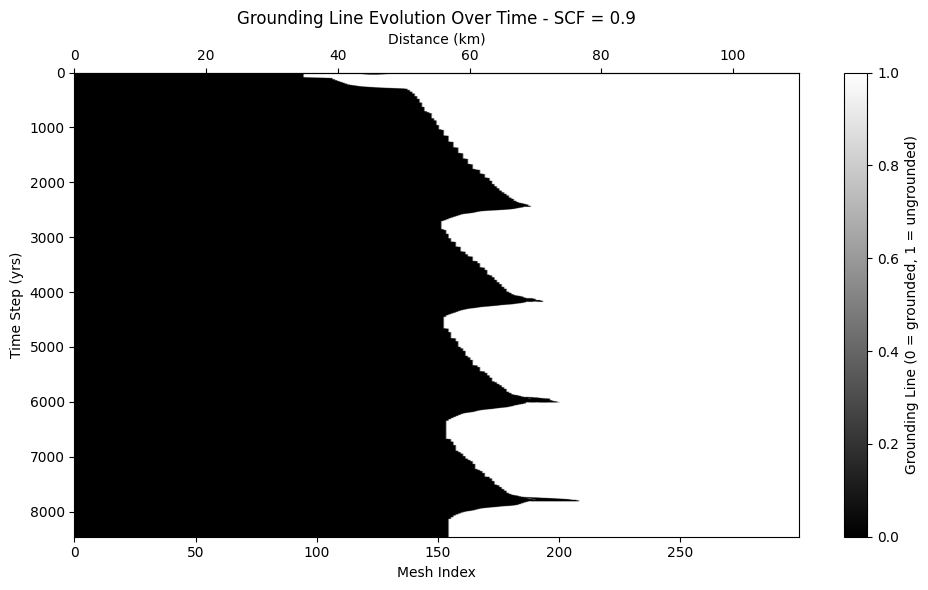

In [50]:
GL_dict = DATA_dict_scf_09['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_scf_09)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [51]:
gl_positions_scf_09 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_scf_09.append(idx)

gl_positions_scf_09 = np.array(gl_positions_scf_09)
GL_km_scf_09 = mesh_index_to_km(gl_positions_scf_09)



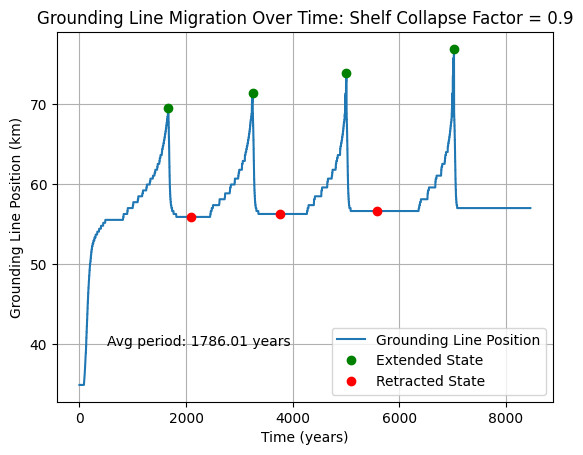

Mean cycle period: 1786.01 years
[1580.84173345 1761.30286335 2015.88101371]
Mean advance amplitude: 72.93 km
[69.53177258 71.37123746 73.94648829 76.88963211]
Mean retreat amplitude: 56.29 km
[55.91973244 56.28762542 56.65551839]


In [52]:
peaks_scf09, _ = find_peaks(GL_km_scf_09, prominence=10) 
troughs_scf09, _ = find_peaks(-GL_km_scf_09, prominence=8)     
periods_scf09 = np.diff(np.array(time)[peaks_scf09])
adv_dists_scf09 = GL_km_scf_09[peaks_scf09]
ret_dists_scf09 = GL_km_scf_09[troughs_scf09]


plt.plot(time, GL_km_scf_09, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_scf09], GL_km_scf_09[peaks_scf09], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_scf09], GL_km_scf_09[troughs_scf09], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_scf09):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Shelf Collapse Factor = 0.9")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_scf09):.2f} years")
print(periods_scf09)

print(f"Mean advance amplitude: {np.mean(adv_dists_scf09):.2f} km")
print(adv_dists_scf09)

print(f"Mean retreat amplitude: {np.mean(ret_dists_scf09):.2f} km")
print(ret_dists_scf09)


## Relationship Plots

In [53]:
## Shelf Collapse Factor ##
title_scf_cycles = str("Number of Cycles Produced VS Shelf Collapse Factor ")
SCFs = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
SCF_cycles = np.array([21, 13, 10, 8, 6, 6, 5, 4, 3, 3])
SCF_coeff = np.polyfit(SCFs,SCF_cycles, 1)
p_SCF = np.poly1d(SCF_coeff)
SCF_y_trend = p_SCF(SCFs)
R_2_SCF =r2_score(SCF_cycles,p_SCF(SCFs))


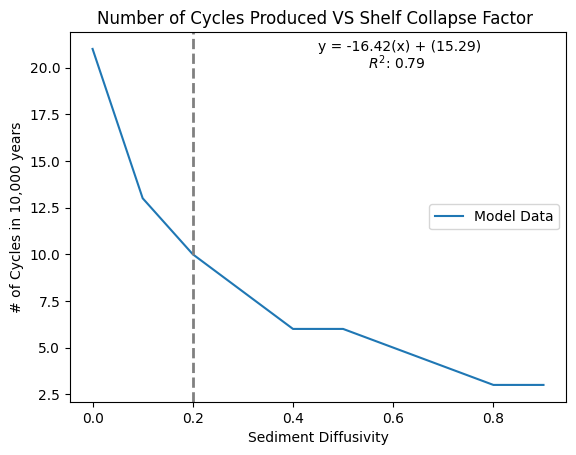

In [54]:
plt.plot(SCFs, SCF_cycles, label = 'Model Data')
plt.title(title_scf_cycles)
# plt.plot(SCFs, SCF_y_trend, color='red', label='Trendline')
plt.text(0.6, 0.9, f'$R^2$: {R_2_SCF:.2f}', transform=plt.gca().transAxes)
plt.text(0.5, 0.95, f'y = {SCF_coeff[0]:.2f}(x) + ({SCF_coeff[1]:.2f})', transform=plt.gca().transAxes)
plt.axvline(x=.2, color='gray', linestyle='--', linewidth=2)
plt.xlabel("Sediment Diffusivity")
plt.ylabel("# of Cycles in 10,000 years")
# plt.xticks(np.arange(0, 2, 0.2))
plt.legend()


## Box & Whisker Plots

Variations in Cycle Period

In [55]:
scfs = np.array([0.0, 0.1, 0.2, 0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

Period_list = [periods_scf0, periods_scf01, periods_scf02, periods_scf03, periods_scf04, periods_scf05, periods_scf06, periods_scf07, periods_scf08, periods_scf09]


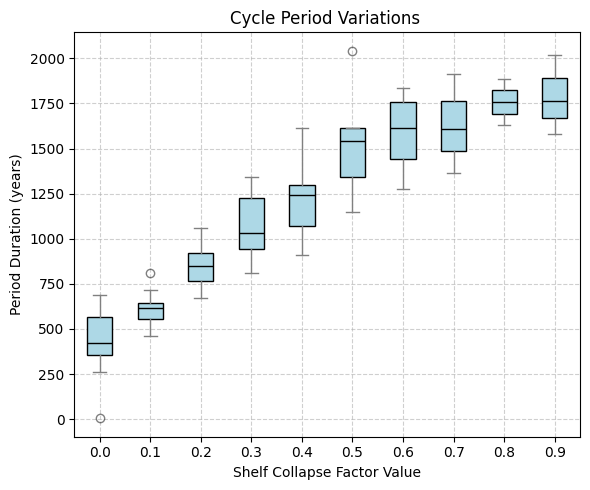

In [56]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(Period_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Cycle Period Variations ")
ax.set_ylabel("Period Duration (years)")
ax.set_xlabel("Shelf Collapse Factor Value")
ax.set_xticks(np.arange(1, len(scfs) + 1))
ax.set_xticklabels(scfs)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Variations in GL Extent - Advance 

In [57]:
scfs = np.array([0.0, 0.1, 0.2, 0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ExtPos_list = [adv_dists_scf0, adv_dists_scf01, adv_dists_scf02, adv_dists_scf03, adv_dists_scf04, adv_dists_scf05, adv_dists_scf06, adv_dists_scf07, adv_dists_scf08, adv_dists_scf09]


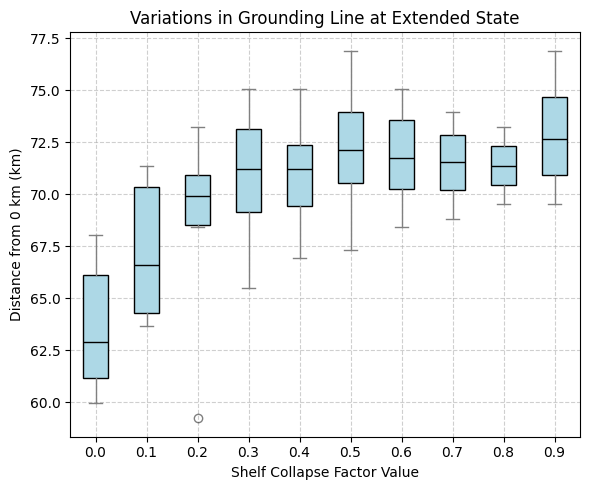

In [58]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in Grounding Line at Extended State")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Shelf Collapse Factor Value")
ax.set_xticks(np.arange(1, len(scfs) + 1))
ax.set_xticklabels(scfs)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/ClimateFactor/Relationship_Plots/CF_Adv_GL_Variations.jpg")

Variations in GL Extent - Retreat 

In [59]:
scfs = np.array([0.0, 0.1, 0.2, 0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
RetPos_list = [ret_dists_scf0, ret_dists_scf01, ret_dists_scf02, ret_dists_scf03, ret_dists_scf04, ret_dists_scf05, ret_dists_scf06, ret_dists_scf07, ret_dists_scf08, ret_dists_scf09]

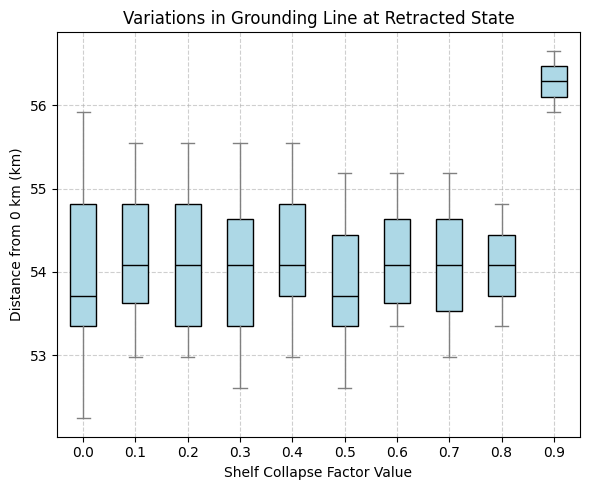

In [60]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in Grounding Line at Retracted State")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Shelf Collapse Factor Value")
ax.set_xticks(np.arange(1, len(scfs) + 1))
ax.set_xticklabels(scfs)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/ClimateFactor/Relationship_Plots/CF_Ret_GL_Variations.jpg")

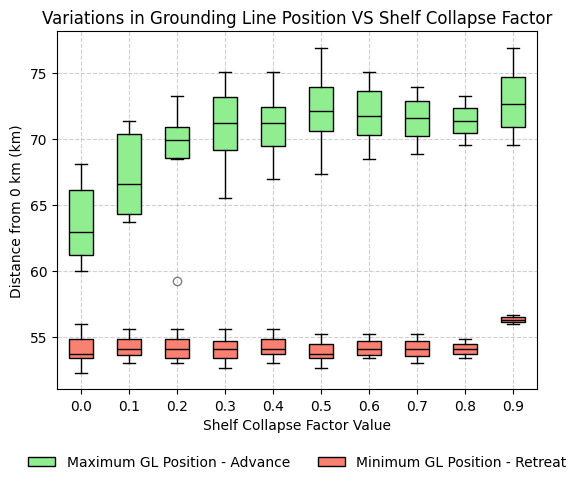

In [61]:
fig, ax = plt.subplots(figsize=(6, 5))

D2 = ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='salmon'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

D1 = ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightgreen'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in Grounding Line Position VS Shelf Collapse Factor")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Shelf Collapse Factor Value")
ax.legend([D1["boxes"][0], D2["boxes"][0]], ['Maximum GL Position - Advance', 'Minimum GL Position - Retreat'], loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=2, frameon=False)
ax.set_xticks(np.arange(1, len(scfs) + 1))
ax.set_xticklabels(scfs)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()